In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [76]:
stocks = yf.download(['BAJFINANCE.NS','BAJAJFINSV.NS','HDFC.NS','HDFCBANK.NS'],start = '2020-06-01', end = '2021-06-01')['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [77]:
stocks.head()

,BAJAJFINSV.NS,BAJFINANCE.NS,HDFC.NS,HDFCBANK.NS
Date,,,,
2020-06-01,4762.045410,2157.364014,1684.385376,983.393860
2020-06-02,5183.443359,2342.415039,1757.908203,996.686340
2020-06-03,5284.768555,2408.008789,1779.330200,1017.844788
2020-06-04,5135.554688,2309.318604,1710.169434,997.383301
2020-06-05,5235.130371,2386.493896,1712.398682,1028.896851


In [78]:
data = stocks.copy()

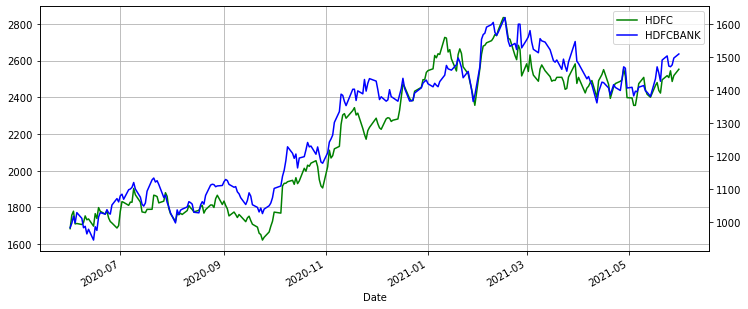

In [79]:
plt.figure(figsize=(12,5))

ax1 = data['HDFC.NS'].plot(color = 'green', grid = True, label = 'HDFC')

ax2 = data['HDFCBANK.NS'].plot(color = 'blue', grid = True, secondary_y = True , label = 'HDFCBANK')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc='best')


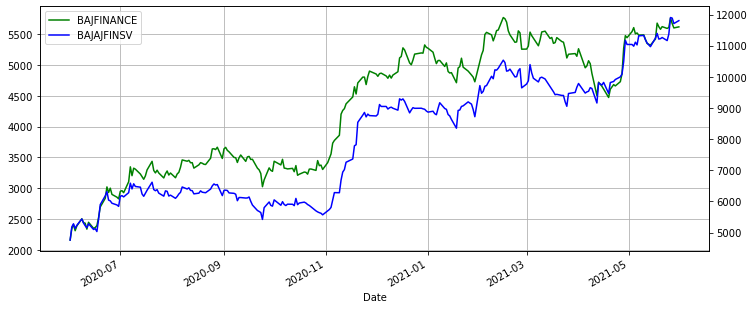

In [80]:
plt.figure(figsize=(12,5))

ax1 = data['BAJFINANCE.NS'].plot(color = 'green', grid = True, label = 'BAJFINANCE')

ax2 = data['BAJAJFINSV.NS'].plot(color = 'blue', grid = True, secondary_y = True , label = 'BAJAJFINSV')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1 + h2, l1 + l2, loc='best')


In [81]:
def normalize_and_accumulate_series(data):
    return data.pct_change().cumsum()

data['HDFC.NS'] = normalize_and_accumulate_series(data['HDFC.NS'])
data['HDFCBANK.NS'] = normalize_and_accumulate_series(data['HDFCBANK.NS'])
data['BAJFINANCE.NS'] = normalize_and_accumulate_series(data['BAJFINANCE.NS'])
data['BAJAJFINSV.NS'] = normalize_and_accumulate_series(data['BAJAJFINSV.NS'])

data.dropna(inplace = True)

In [82]:
data.head()

,BAJAJFINSV.NS,BAJFINANCE.NS,HDFC.NS,HDFCBANK.NS
Date,,,,
2020-06-02,0.088491,0.085776,0.043650,0.013517
2020-06-03,0.108039,0.113779,0.055836,0.034746
2020-06-04,0.079804,0.072795,0.016967,0.014643
2020-06-05,0.099194,0.106214,0.018270,0.046239
2020-06-08,0.138257,0.155119,0.014987,0.029352


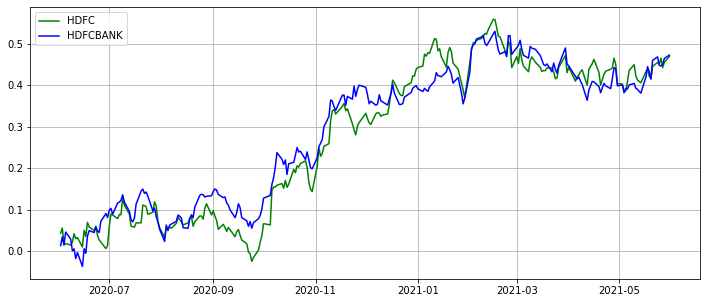

In [83]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(data['HDFC.NS'], color='green', label='HDFC')
plt.plot(data['HDFCBANK.NS'], color='blue', label='HDFCBANK')
ax.grid(True)
plt.legend(loc=2)
plt.show()

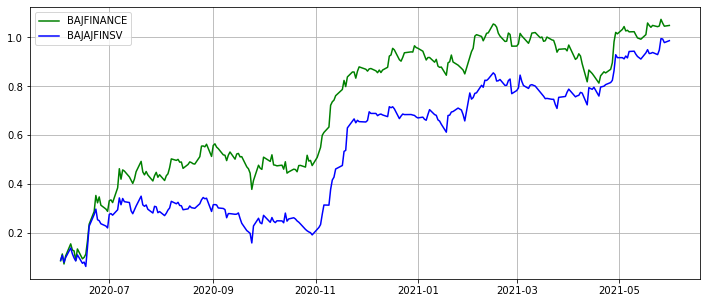

In [84]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(data['BAJFINANCE.NS'], color='green', label='BAJFINANCE')
plt.plot(data['BAJAJFINSV.NS'], color='blue', label='BAJAJFINSV')
ax.grid(True)
plt.legend(loc=2)
plt.show()

In [85]:
from statsmodels.tsa.stattools import coint

def corr(data1, data2):
    return data1.corr(data2)

In [88]:
stock_name_1 = 'HDFC.NS'
stock_name_2 = 'HDFCBANK.NS'

score, pvalue, _ = coint(data[stock_name_1], data[stock_name_2])
correlation = corr(data[stock_name_1], data[stock_name_2])

print('Correlation between %s and %s is %f' % (stock_name_1, stock_name_2, correlation))
print('Cointegration between %s and %s is %f' % (stock_name_1, stock_name_2, pvalue))

Correlation between HDFC.NS and HDFCBANK.NS is 0.978659
Cointegration between HDFC.NS and HDFCBANK.NS is 0.012702


To be statistically significant, the p-value obtained from Co-integration should be less than 0.05

In [89]:
stock_name_1 = 'BAJFINANCE.NS'
stock_name_2 = 'BAJAJFINSV.NS'

score, pvalue, _ = coint(data[stock_name_1], data[stock_name_2])
correlation = corr(data[stock_name_1], data[stock_name_2])

print('Correlation between %s and %s is %f' % (stock_name_1, stock_name_2, correlation))
print('Cointegration between %s and %s is %f' % (stock_name_1, stock_name_2, pvalue))

Correlation between BAJFINANCE.NS and BAJAJFINSV.NS is 0.960718
Cointegration between BAJFINANCE.NS and BAJAJFINSV.NS is 0.400860


The above pair-trade is probably not a good idea.